Дисциплина «Искусственный интеллект»
Рабочая тетрадь № 4
Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

1.1.1 Пример
Задача:
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [ ]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
#Перепишем линейное урабнение у = mx + с как у = Xp, где A = [[ × 1 ]] и p = [[m], [с]]
#Построим А по х :
A = np.vstack([x, np. ones(len(x))]).T
#Используем метод istsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример
Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [ ]:
from numpy import *

from numpy.random import *
#генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)

x += delta*(rand(11)-0.5)
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', 'An')
# читаем данные из файлов

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида у = ax 2 + bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], "-", lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример
Задача:
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

In [ ]:
#Решение
# Нахождение коэффициентов функции вида у = ax*3 + bx*2 + сх + d методом наименьших квадратов # задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*3 + bx*2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt. grid()
plt.savefig('полином 3-й степени.png')

1.1.3.1 Задание:
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

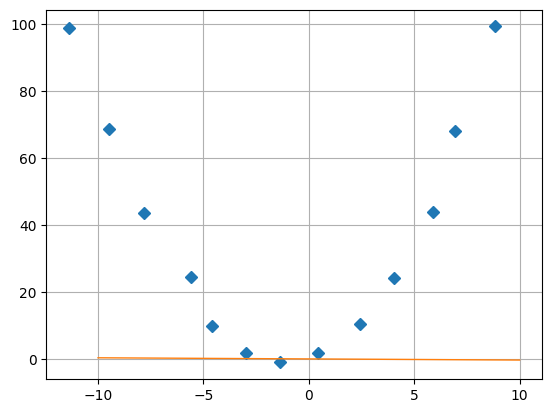

In [19]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0]*x_prec,'-',lw=1)
plt.grid()
plt.savefig('по идее прямая')

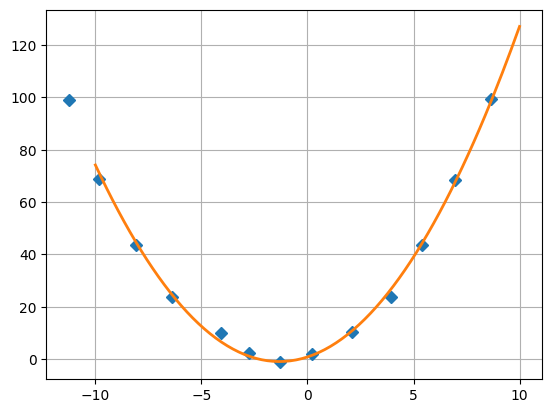

In [21]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x**2, x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**2 + s[1]*x_prec + s[2],'-',lw=2)
plt.grid()
plt.savefig('по идее не прямая')

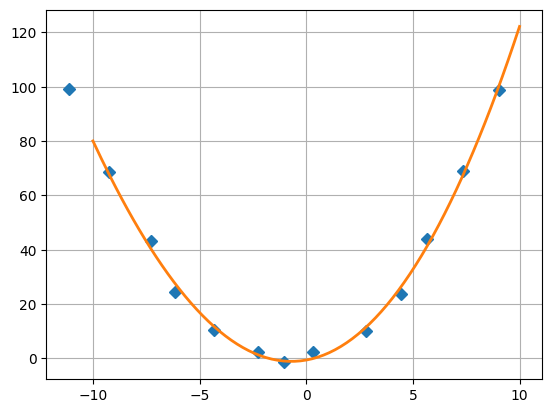

In [22]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x**3,x**2, x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-',lw=2)
plt.grid()
plt.savefig('по идее не прямая')

1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

In [ ]:
import scipy as sp

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata u ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"Sx$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + x * b1


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#2
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + x * b1 + x * x * b2


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#3
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(5, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(4, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()

Задание:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

def f(x, b0, b1):
    return b0 + x * b1


xdata = np.linspace(0, 5, 55)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#2
beta = (0.25, 0.75, 0.55)


def f(x, b0, b1, b2):
    return b0 + x * b1 + x * x * b2


xdata = np.linspace(0, 5, 55)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#3
beta = (1, 4)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 55)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(5, 10, 55)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(4, 12)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()

1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

1.2.1 Пример
Задача:
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

In [ ]:
#Импортируем необходимые библиотеки
#используем pandas и питру для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей. import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#создадим набор данных для описания взаимосбязи между временем обучения студентов и успебаемостью
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.e0,5.50],
        "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()
 #Исследуем набор данных
print(dataset.shape)
dataset. describe()
# Нарисуем точечную диаграмму
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набар тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#приведем получившиеся коэффициенты для линии регрессии print(regressor.intercept
print(regressor.coef_)

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [ ]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [ ]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

1.3.2 Пример
Задача:
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
# формируем DataFrame из дбух спискоб
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd. DataFrame(new_y)
new_X = np. array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset. head()
# изучим данные
print(dataset.shape)
dataset. describe()
# разделим данные на метки и атрибуты
x - dataset[['x1', 'x2', 'x3']]
y - dataset['y']
# разделим данные на обучашую и тестобую быборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0.1)

regressor= LinearRegression()
regressor.Fit(X_train, y_train)

#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
#Последний - сценить произбодительность алгоритма, Мы сделаем это, майдл значения для MSE
print("Mean Squared Errors", metrics.nean_squared_error(y_test, y_pred))

Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


url='https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataframe=pd.read_csv(url)
dataframe.head()
print(dataframe.shape)
dataframe.describe()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


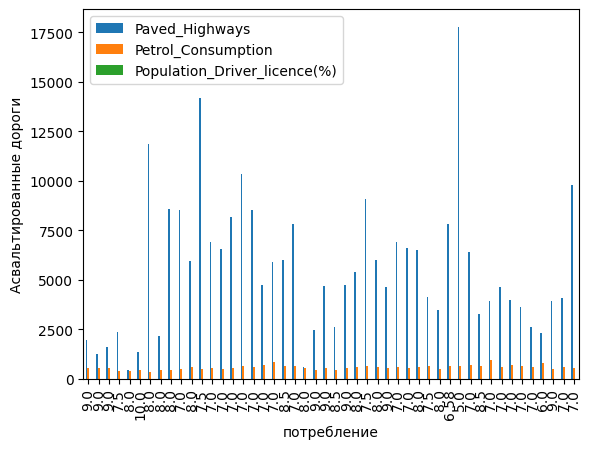

In [34]:
dataframe.plot(x="Petrol_tax",y=['Paved_Highways','Petrol_Consumption','Population_Driver_licence(%)'],kind="bar")
plt.xlabel("Штаты")
plt.ylabel("Потребление бензина")
plt.show()

In [36]:
X=dataframe[['Average_income','Population_Driver_licence(%)','Petrol_Consumption']]
y=dataframe['Petrol_tax']
print(X)
print(y)

    Average_income  Population_Driver_licence(%)  Petrol_Consumption
0             3571                         0.525                 541
1             4092                         0.572                 524
2             3865                         0.580                 561
3             4870                         0.529                 414
4             4399                         0.544                 410
5             5342                         0.571                 457
6             5319                         0.451                 344
7             5126                         0.553                 467
8             4447                         0.529                 464
9             4512                         0.552                 498
10            4391                         0.530                 580
11            5126                         0.525                 471
12            4817                         0.574                 525
13            4207                

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Коэффициент'])
coef_df

,Коэффициент
Average_income,-0.000282
Population_Driver_licence(%),4.513605
Petrol_Consumption,-0.005763


In [42]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
29,9.0,7.745885
4,8.0,8.466001
26,8.0,7.789398
30,7.0,7.634500
32,8.0,8.033229
37,7.0,7.102528
34,8.0,8.010238
40,7.0,7.801928
7,8.0,7.973379
10,8.0,7.425299


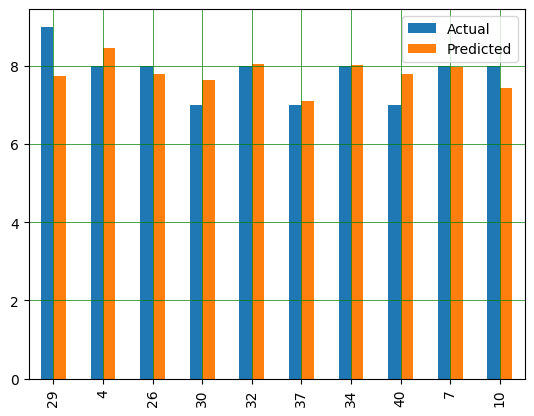

In [43]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [45]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.32227024950417993


Задание*
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

-0.4285714285714293 4.380952380952379


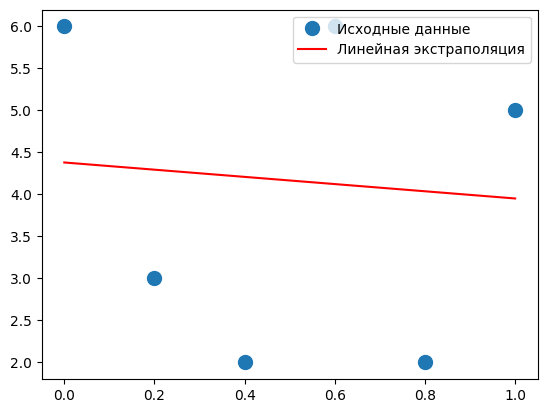

[0.  0.2 0.4 0.6 0.8 1. ]
[6. 3. 2. 6. 2. 5.]
-0.0023516 0.19277 -0.68789


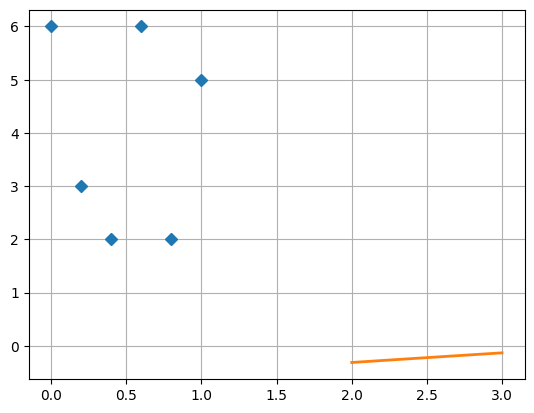

In [46]:
import numpy as np

x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [3.0, 6.0, 3.0, 6.0, 4.0, 3.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A
m, c = np.linalg.lstsq(A, new_y, rcond=None)[0]
print(m, c)
import numpy as np

x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [6.0, 3.0, 2.0, 6.0, 2.0, 5.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A
import matplotlib.pyplot as plt

plt.plot(new_x, new_y, 'o', label='Исходные данные', markersize=10)
plt.plot(new_x, m * new_x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()
from numpy import *
from numpy.random import *

print(new_x)
print(new_y)
m = vstack((new_x ** 2, new_x, ones(6))).T
s = np.linalg.lstsq(m, new_y, rcond=None)[0]
s = [-0.0023516, 0.19277, -0.68789]
x_prec = linspace(2, 3, 11)
plt.plot(new_x, new_y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
print(s[0], s[1], s[2])
plt.savefig('параболанов.png')